In [1]:
import pandas as pd

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
path="/content/drive/MyDrive/dataset/phishing_site_urls.csv"
df=pd.read_csv(path)
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [37]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


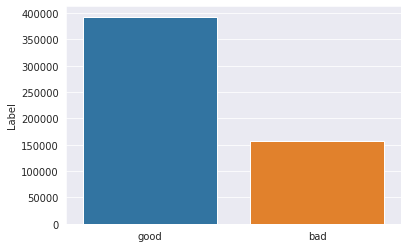

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
label_counts = pd.DataFrame(df.Label.value_counts())

sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [42]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
#after tokenizer we split the word by word according to the expression
tokenizer.tokenize(df.URL[0])


['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [44]:

import time
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 5.076692454000295 sec


In [45]:
df.sample(5)

,URL,Label,text_tokenized
492067,bqznoo.ggmfwpovjpjjzytvzab.ga:28053/arrival/18...,bad,"[bqznoo, ggmfwpovjpjjzytvzab, ga, arrival, non..."
136433,cirqueentertainment.com/view/up/index.php,bad,"[cirqueentertainment, com, view, up, index, php]"
430695,shortfilmtexas.com/2008/american-idol-producer...,good,"[shortfilmtexas, com, american, idol, producer..."
376320,linkedin.com/pub/dir/+/Woloshen/+/,good,"[linkedin, com, pub, dir, Woloshen]"
543370,madde.org/hfvg623,bad,"[madde, org, hfvg]"


In [52]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english") # choose a language
print('Getting words stemmed ...')
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
df.sample(5)

Getting words stemmed ...


,URL,Label,text_tokenized,text_stemmed
366202,joie.com/,good,"[joie, com]","[joie, com]"
533831,www.oltransservice.org/j8fn3rg3,bad,"[www, oltransservice, org, j, fn, rg]","[www, oltransservic, org, j, fn, rg]"
537766,maktab.seeroo.com/t76f3g,bad,"[maktab, seeroo, com, t, f, g]","[maktab, seeroo, com, t, f, g]"
43826,grahatata.com/includes/index.htm,bad,"[grahatata, com, includes, index, htm]","[grahatata, com, includ, index, htm]"
523572,tualimpa.pt/loads/cp.php?m=login,bad,"[tualimpa, pt, loads, cp, php, m, login]","[tualimpa, pt, load, cp, php, m, login]"


In [53]:
print('Getting joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

df.sample(5)

Getting joiningwords ...


,URL,Label,text_tokenized,text_stemmed,text_sent
226816,people.famouswhy.com/raveena_tandon/,good,"[people, famouswhy, com, raveena, tandon]","[peopl, famouswhi, com, raveena, tandon]",peopl famouswhi com raveena tandon
252692,uk.eurosport.yahoo.com/football/logan-bailly.html,good,"[uk, eurosport, yahoo, com, football, logan, b...","[uk, eurosport, yahoo, com, footbal, logan, ba...",uk eurosport yahoo com footbal logan bailli html
389711,mispedia.org/USS_Florence_Nightingale_(AP-70)....,good,"[mispedia, org, USS, Florence, Nightingale, AP...","[mispedia, org, uss, florenc, nightingal, ap, ...",mispedia org uss florenc nightingal ap html
239138,shreveport.la.usa.jobs/kansas.city.southern.ra...,good,"[shreveport, la, usa, jobs, kansas, city, sout...","[shreveport, la, usa, job, kansa, citi, southe...",shreveport la usa job kansa citi southern railway
177600,en.wikipedia.org/wiki/Liza_Frulla,good,"[en, wikipedia, org, wiki, Liza, Frulla]","[en, wikipedia, org, wiki, liza, frulla]",en wikipedia org wiki liza frulla


In [56]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [63]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [64]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [74]:

from sklearn.feature_extraction.text import CountVectorizer
cvec=CountVectorizer()
feature = cvec.fit_transform(df.text_sent)
feature

<549346x350837 sparse matrix of type '<class 'numpy.int64'>'
	with 3676066 stored elements in Compressed Sparse Row format>